In [1]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Download the data for ITC and RELIANCE stocks using yahoo finance library
nsei_df = yf.download('^NSEI', period = '4y')[['Adj Close']]
nsebank_df = yf.download('^NSEBANK', period = '4y')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Taking a peek at the fetched data
nsei_df.tail()

,Adj Close
Date,
2023-03-13 00:00:00+05:30,17154.300781
2023-03-14 00:00:00+05:30,17043.300781
2023-03-15 00:00:00+05:30,16972.150391
2023-03-16 00:00:00+05:30,16985.599609
2023-03-17 00:00:00+05:30,17100.050781


In [3]:
nsebank_df.tail()

,Adj Close
Date,
2023-03-13 00:00:00+05:30,39564.699219
2023-03-14 00:00:00+05:30,39411.398438
2023-03-15 00:00:00+05:30,39051.500000
2023-03-16 00:00:00+05:30,39132.601562
2023-03-17 00:00:00+05:30,39598.101562


In [4]:
# Compute the returns of the two stocks
nsei_df['Returns'] = nsei_df['Adj Close'].pct_change()
nsebank_df['Returns'] = nsebank_df['Adj Close'].pct_change()
print(nsebank_df[['Adj Close','Returns']])

                              Adj Close   Returns
Date                                             
2019-03-18 00:00:00+05:30  29595.755859       NaN
2019-03-19 00:00:00+05:30  29767.503906  0.005803
2019-03-20 00:00:00+05:30  29831.851562  0.002162
2019-03-22 00:00:00+05:30  29582.156250 -0.008370
2019-03-25 00:00:00+05:30  29280.859375 -0.010185
...                                 ...       ...
2023-03-13 00:00:00+05:30  39564.699219 -0.022743
2023-03-14 00:00:00+05:30  39411.398438 -0.003875
2023-03-15 00:00:00+05:30  39051.500000 -0.009132
2023-03-16 00:00:00+05:30  39132.601562  0.002077
2023-03-17 00:00:00+05:30  39598.101562  0.011895

[986 rows x 2 columns]


In [5]:
# Compute the standard deviation of the returns using the pandas std() method
daily_sd_nsei = nsei_df['Returns'].std()
daily_sd_nsebank = nsebank_df['Returns'].std()

In [6]:
nsebank_df.dropna(inplace=True)
nsebank_df.head()

,Adj Close,Returns
Date,,
2019-03-19 00:00:00+05:30,29767.503906,0.005803
2019-03-20 00:00:00+05:30,29831.851562,0.002162
2019-03-22 00:00:00+05:30,29582.156250,-0.008370
2019-03-25 00:00:00+05:30,29280.859375,-0.010185
2019-03-26 00:00:00+05:30,29881.802734,0.020523


In [7]:
import numpy as np
# Annualized standard deviation
annualized_sd_nsei = daily_sd_nsei * np.sqrt(252)
annualized_sd_nsebank = daily_sd_nsebank * np.sqrt(252)
print(f'The annualized standard deviation of the NSEI stock daily returns is: {annualized_sd_nsei*100:.2f}%')
print(f'The annualized standard deviation of the NSEBANK stock daily returns is: {annualized_sd_nsebank*100:.2f}%')

The annualized standard deviation of the NSEI stock daily returns is: 20.81%
The annualized standard deviation of the NSEBANK stock daily returns is: 28.70%


In [8]:
nsei_df['z-score'] = (nsei_df['Returns'] - nsei_df['Returns'].mean())/nsei_df['Returns'].std(ddof=1)

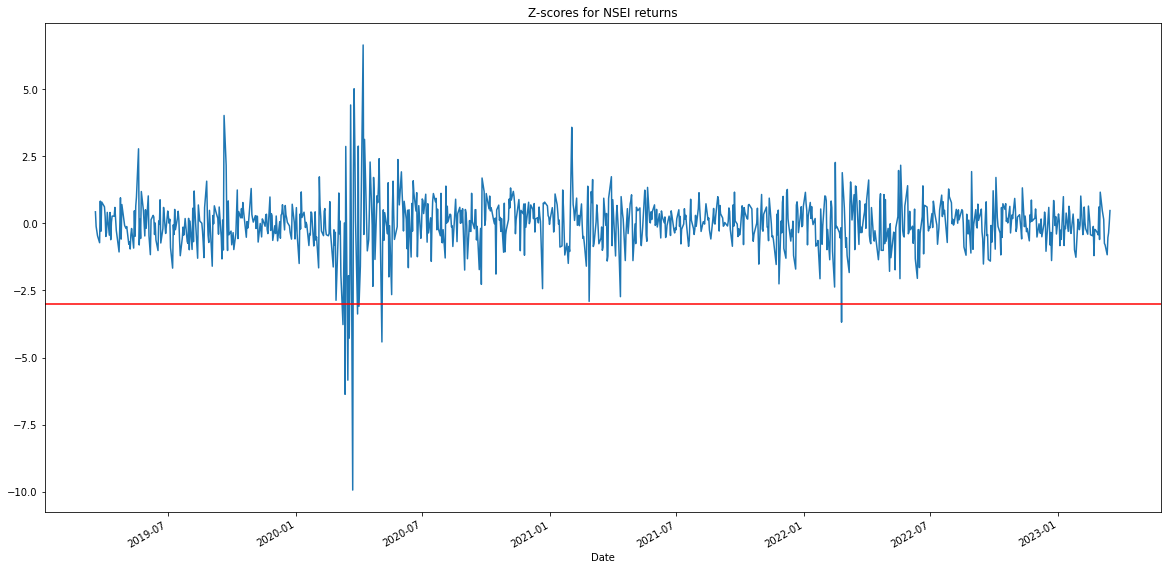

In [9]:
import matplotlib.pyplot as plt

nsei_df['z-score'].plot(figsize=(20,10));
plt.axhline(-3, color='r')
plt.title('Z-scores for NSEI returns')
plt.show();

In [10]:
nsebank_df['z-score'] = (nsebank_df['Returns'] - nsebank_df['Returns'].mean())/nsebank_df['Returns'].std(ddof=1)

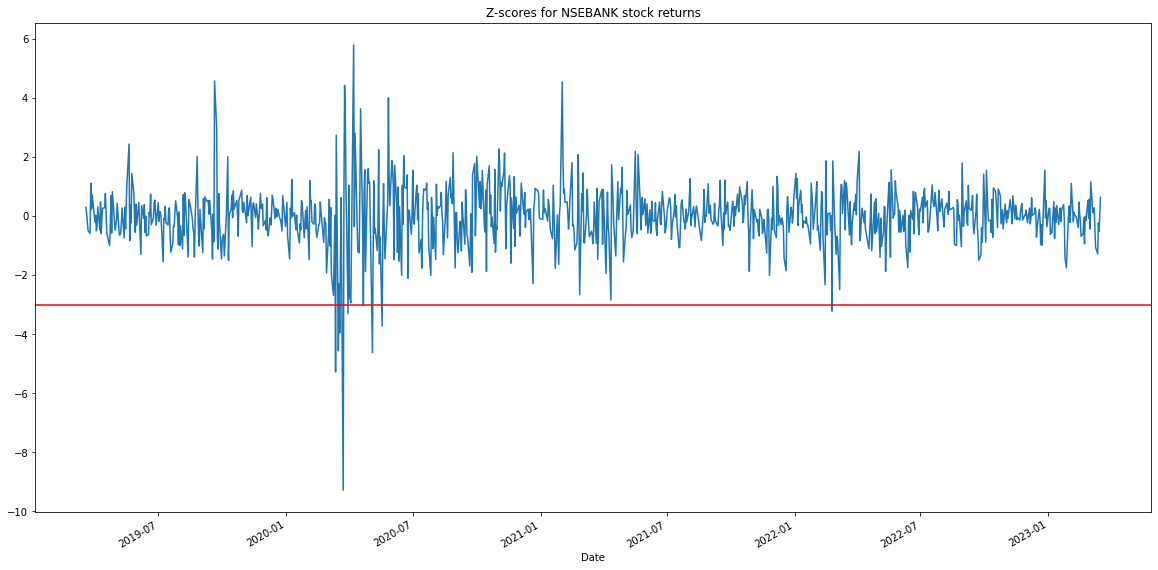

In [11]:
import matplotlib.pyplot as plt

nsebank_df['z-score'].plot(figsize=(20,10));
plt.axhline(-3, color='r')
plt.title('Z-scores for NSEBANK stock returns')
plt.show();

In [12]:
# Computing z-scores in python using scipy.stats module
import scipy.stats as stats
nsebank_df['Returns_zscore'] = stats.zscore(nsebank_df['Returns'])
nsebank_df.head()

,Adj Close,Returns,z-score,Returns_zscore
Date,,,,
2019-03-19 00:00:00+05:30,29767.503906,0.005803,0.295483,0.295633
2019-03-20 00:00:00+05:30,29831.851562,0.002162,0.094077,0.094124
2019-03-22 00:00:00+05:30,29582.156250,-0.008370,-0.488427,-0.488675
2019-03-25 00:00:00+05:30,29280.859375,-0.010185,-0.588813,-0.589112
2019-03-26 00:00:00+05:30,29881.802734,0.020523,1.109650,1.110214


In [13]:
nsebank_df.tail()

,Adj Close,Returns,z-score,Returns_zscore
Date,,,,
2023-03-13 00:00:00+05:30,39564.699219,-0.022743,-1.283366,-1.284018
2023-03-14 00:00:00+05:30,39411.398438,-0.003875,-0.239790,-0.239911
2023-03-15 00:00:00+05:30,39051.500000,-0.009132,-0.530558,-0.530828
2023-03-16 00:00:00+05:30,39132.601562,0.002077,0.089381,0.089427
2023-03-17 00:00:00+05:30,39598.101562,0.011895,0.632444,0.632765
